In [1]:
import numpy as np
from sage.all import *

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

%reload_ext autoreload
%autoreload 2

import Wigner

In [2]:
# Load data
F = GF(2**5, 'a')
w = F.gen()

In [4]:
F = [F(0)] + [w**j for j in range(32-1)]
F

[0,
 1,
 a,
 a^2,
 a^3,
 a^4,
 a^2 + 1,
 a^3 + a,
 a^4 + a^2,
 a^3 + a^2 + 1,
 a^4 + a^3 + a,
 a^4 + 1,
 a^2 + a + 1,
 a^3 + a^2 + a,
 a^4 + a^3 + a^2,
 a^4 + a^3 + a^2 + 1,
 a^4 + a^3 + a^2 + a + 1,
 a^4 + a^3 + a + 1,
 a^4 + a + 1,
 a + 1,
 a^2 + a,
 a^3 + a^2,
 a^4 + a^3,
 a^4 + a^2 + 1,
 a^3 + a^2 + a + 1,
 a^4 + a^3 + a^2 + a,
 a^4 + a^3 + 1,
 a^4 + a^2 + a + 1,
 a^3 + a + 1,
 a^4 + a^2 + a,
 a^3 + 1,
 a^4 + a]

In [6]:
mubs = np.load('MUBS/2-5-desarguesian.npy')
mubs_kantor = np.load('MUBS/2-5-kantor.npy')

In [7]:
wootters = Wigner.Wigner(F, mubs, op='desargues')
kantor   = Wigner.Wigner(F, mubs_kantor, op='kantor')

/Users/ernesto/mambaforge/envs/wigner/lib/python3.9/site-packages/IPython/extensions/autoreload.py:419: DeprecationWarning: 
Importing verbose from here is deprecated; please use "from sage.misc.verbose import verbose" instead.
See http://trac.sagemath.org/17815 for details.
  in_module = hasattr(obj, "__module__") and obj.__module__ == module.__name__
/Users/ernesto/mambaforge/envs/wigner/lib/python3.9/site-packages/IPython/extensions/autoreload.py:419: DeprecationWarning: 
Importing union from here is deprecated; please use "from sage.misc.misc import union" instead.
See https://trac.sagemath.org/32096 for details.
  in_module = hasattr(obj, "__module__") and obj.__module__ == module.__name__
Added 0 synonyms
/Users/ernesto/mambaforge/envs/wigner/lib/python3.9/site-packages/IPython/extensions/autoreload.py:419: DeprecationWarning: 
Importing PowerSeries from here is deprecated; please use "from sage.rings.power_series_ring_element import PowerSeries" instead.
See https://trac.sagemat

<Axes: >

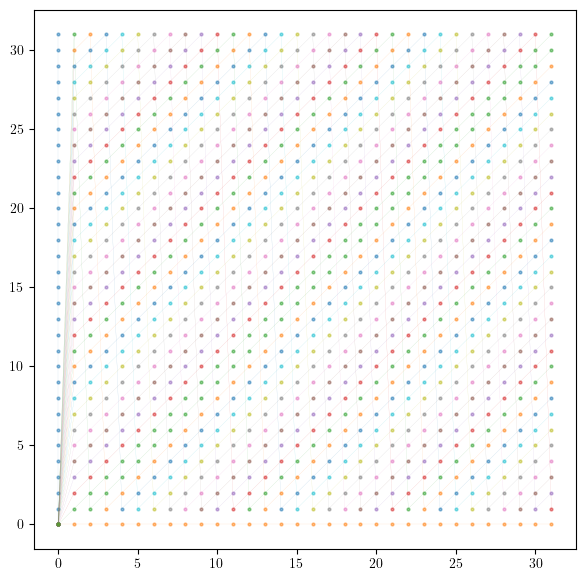

In [10]:
def affineAx(F):
    d = len(F)
    fig, ax = plt.subplots(figsize=(7,7))
    labels = range(d)
    
    return fig, ax

def plotSpread(lines, ax):
    for i, line in enumerate(lines):
        x, y = np.array(line).T
        x = [wootters.toInt(e) for e in x]
        y = [wootters.toInt(e) for e in y]

        alpha = 0.5

        ax.plot(
            x, y,
            marker='o',
            linewidth=0.1,
            markersize=2,
            alpha=alpha
        )
    return ax

fig, ax = affineAx(F)
lines = wootters.Spread()
plotSpread(lines, ax)

<Axes: >

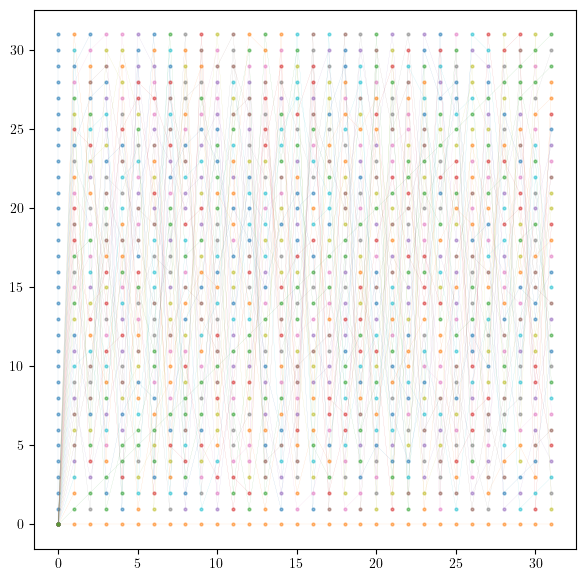

In [11]:
fig, ax = affineAx(F)
lines = kantor.Spread()
plotSpread(lines, ax)

In [12]:
def wigner3d(M, rotate=True):
    if rotate:
        M = np.rot90(M, -1)

    n = np.size(M)
    xpos, ypos = np.meshgrid(range(M.shape[0]), range(M.shape[1]))
    xpos = xpos.T.flatten() - 0.5
    ypos = ypos.T.flatten() - 0.5
    zpos = np.zeros(n)
    dx = dy = 0.8 * np.ones(n)
    dz = np.real(M.flatten())

    z_min = min(dz)
    z_max = max(dz)
    if z_min == z_max:
        z_min -= 0.1
        z_max += 0.1

    norm = mpl.colors.Normalize(z_min, z_max)
    cmap = mpl.colormaps['viridis']
    colors = cmap(norm(dz))

    fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(projection='3d', azim=145, elev=35)
    ax = fig.add_subplot(projection='3d', azim=-35, elev=35)

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)

    # x axis
    # ax.axes.xaxis.set_major_locator(plt.IndexLocator(1, 0))

    # y axis
    # ax.axes.yaxis.set_major_locator(plt.IndexLocator(1, -1))
    # ax.invert_yaxis()

    # labels_x = [r'$\uparrow\uparrow$',
    #           r'$\uparrow\downarrow$',
    #           r'$\downarrow\uparrow$',
    #           r'$\downarrow\downarrow$']
    # labels_y = [r'$\rightarrow\rightarrow$',
    #           r'$\rightarrow\leftarrow$',
    #           r'$\leftarrow\rightarrow$',
    #           r'$\leftarrow\leftarrow$']
    # ax.set_xticklabels(labels_x)
    # ax.set_yticklabels(labels_y)
    # ax.set_xticklabels(range(n))
    # ax.set_yticklabels(range(n))

    # z axis
    # ax.axes.zaxis.set_major_locator(plt.IndexLocator(1, 0.5))
    ax.set_zlim3d([z_min, z_max])

    cax, kw = mpl.colorbar.make_axes(ax, shrink=.75, pad=.1)
    mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)

    return fig, ax

In [36]:
def wignerHeat(M, rotate=False):
    if rotate:
        M = np.rot90(M, -1)
    
    fig, ax = plt.subplots()
    im = ax.imshow(M.T, origin='lower')
    fig.colorbar(im)

    return fig, ax

Ejemplos.

$|\psi_1\rangle$

In [200]:
s1 = mubs[32*14:32*15,10]
w = wootters.WignerMatrix(wootters.npProj(s1))

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

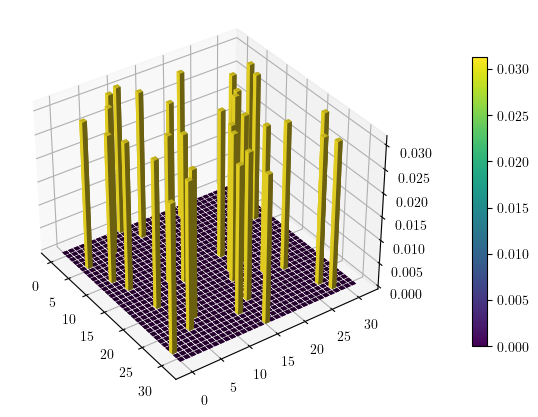

In [201]:
wigner3d(w)

In [203]:
wk = kantor.WignerMatrix(kantor.npProj(s1))

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

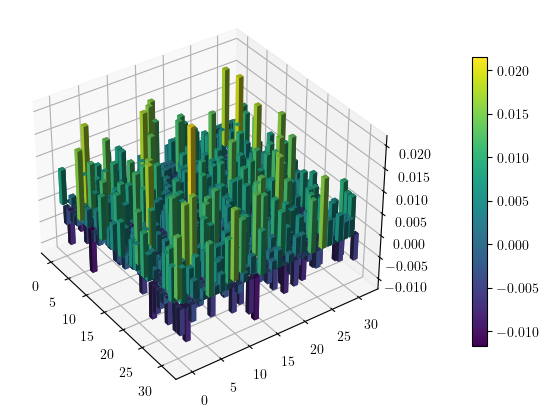

In [204]:
wigner3d(wk)

$|\langle \psi_1 | e_0\rangle|^2$

In [229]:
np.abs(mubs[32*0:32*1,0].conj().T @ s1)**2

0.03124999893035807

In [230]:
w[:,0].sum()

0.031249940395358663

In [231]:
wk[:,0].sum()

0.03124994039535866

$|\langle \psi_1 | b_{1,0}\rangle|^2$

In [216]:
np.abs(mubs[32*1:32*2,0].conj().T @ s1)**2

0.031249993662002318

In [217]:
w[31,:].sum()

0.03124994039535867

In [218]:
wk[31,:].sum()

0.0312499402716674

$|\psi_2\rangle$

In [232]:
s2 = mubs_kantor[32*14:32*15,10]
w = wootters.WignerMatrix(wootters.npProj(s2))
wk = kantor.WignerMatrix(kantor.npProj(s2))

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

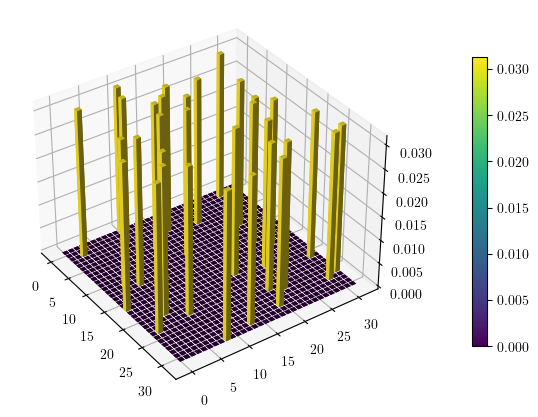

In [235]:
wigner3d(wk)

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

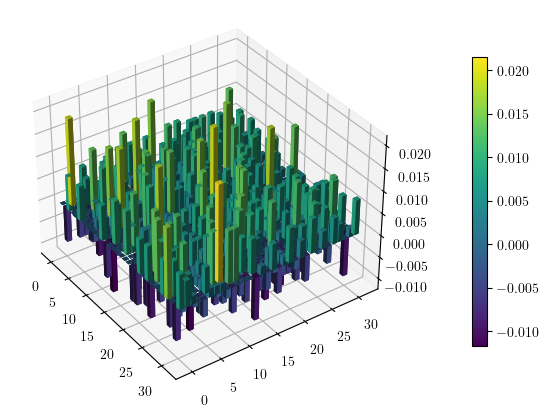

In [236]:
wigner3d(w)

In [237]:
np.abs(mubs[32*0:32*1,0].conj().T @ s2)**2

0.03124999893035807

In [238]:
w[:,0].sum()

0.031249940395358666

In [239]:
wk[:,0].sum()

0.03124994039535867

$|\psi_3\rangle = \frac{1}{\sqrt{2}} \left( \ket{a^4} + \ket{a^4+a^3} \right)$.

In [288]:
F[10]

a^4 + a^3 + a

In [298]:
F[19]

a + 1

In [299]:
s2 = mubs[0:32, 10] + mubs[0:32, 19]
s2 = s2 / np.linalg.norm(s2)

In [300]:
s2

array([0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.70710677+0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.70710677+0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
      dtype=complex64)

In [301]:
w = wootters.WignerMatrix(wootters.npProj(s2))

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

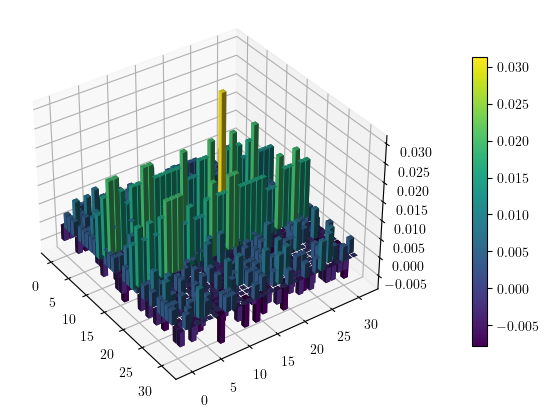

In [302]:
wigner3d(w)

(<Figure size 640x480 with 2 Axes>, <Axes: >)

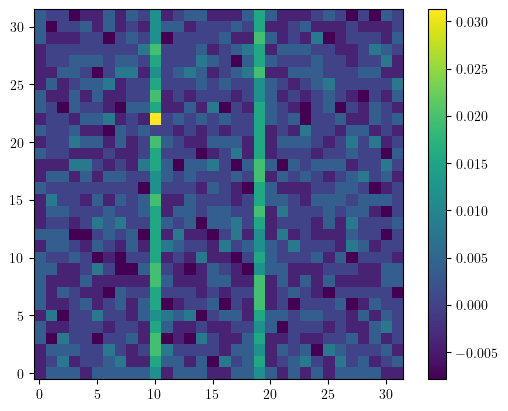

In [303]:
wignerHeat(w, rotate=True)

In [313]:
w[-23,:].sum().round(3)

0.062

In [314]:
(np.abs(mubs[32:64,22] @ s2)**2).round(3)

0.062

In [315]:
(np.abs(mubs[32:64,23] @ s2)**2).round(3)

0.0

In [349]:
for i in range(32):
    print(w[i,:].sum().round(3))

-0.0
-0.0
-0.0
0.062
0.062
0.062
0.062
-0.0
-0.0
0.062
-0.0
0.062
-0.0
0.062
0.062
-0.0
0.062
0.062
0.062
-0.0
0.062
-0.0
-0.0
-0.0
-0.0
-0.0
0.062
-0.0
-0.0
0.062
0.062
0.062


In [317]:
wk = kantor.WignerMatrix(kantor.npProj(s2))

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

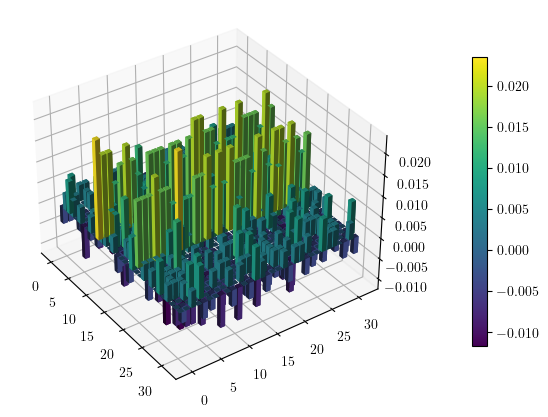

In [318]:
wigner3d(wk)

(<Figure size 640x480 with 2 Axes>, <Axes: >)

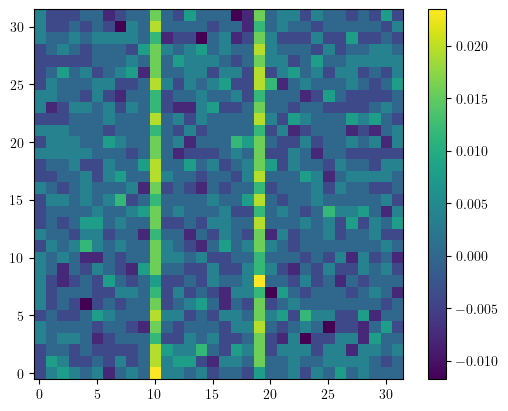

In [319]:
wignerHeat(wk, rotate=True)

In [356]:
wk[-23,:].sum().round(3)

0.062

In [361]:
wk[:,19].sum().round(3)

0.5

[a^4 + a^3, a, a^3 + 1, a^4 + a^3 + a^2 + a + 1, a^4 + a^2 + a, a^2, a^2 + 1, a^2 + a + 1, a + 1, a^3 + a + 1, a^4 + a^3 + a + 1, a^4 + a^3 + a^2 + a, a^4 + a^2, 0, a^3 + a^2 + 1, a^4 + a^2 + a + 1, a^2 + a, 1, a^3 + a^2 + a + 1, a^4 + a + 1, a^3 + a^2 + a, a^4 + 1, a^3 + a, a^4 + a^3 + 1, a^4 + a^3 + a, a^4 + a^3 + a^2, a^4, a^3, a^4 + a^3 + a^2 + 1, a^4 + a, a^3 + a^2, a^4 + a^2 + 1]


<Axes: >

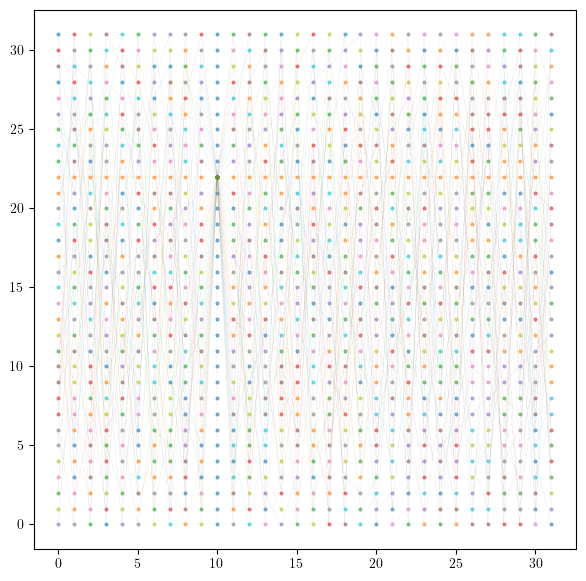

In [328]:
fig, ax = affineAx(F)
lines = wootters.PointLines(F[10], F[22])
plotSpread(lines, ax)

A little testing on the point operators.

In [329]:
A = wootters.A(F[10], F[22])
A.trace()

(0.999998152256012+0j)

In [331]:
np.all(A.conj().T == A)

True

In [334]:
A2 = wootters.A(F[9], F[22])
(A @ A2.conj().T).trace().round(4)

(-0-0j)

They are unit trace, and self-adjoint and Hilbert-Schmidt orthogonal! Now let's check Kantor's version.

In [335]:
A = kantor.A(F[10], F[22])
A.trace()

(0.999998152256012+0j)

In [338]:
np.all(A == A.conj().T)

True

In [337]:
A2 = kantor.A(F[10], F[22])
(A @ A2.conj().T).trace().round(4)

(32+0j)

The point operators are unit trace, self-adjoint and Hilbert Schmidt orthogonal!